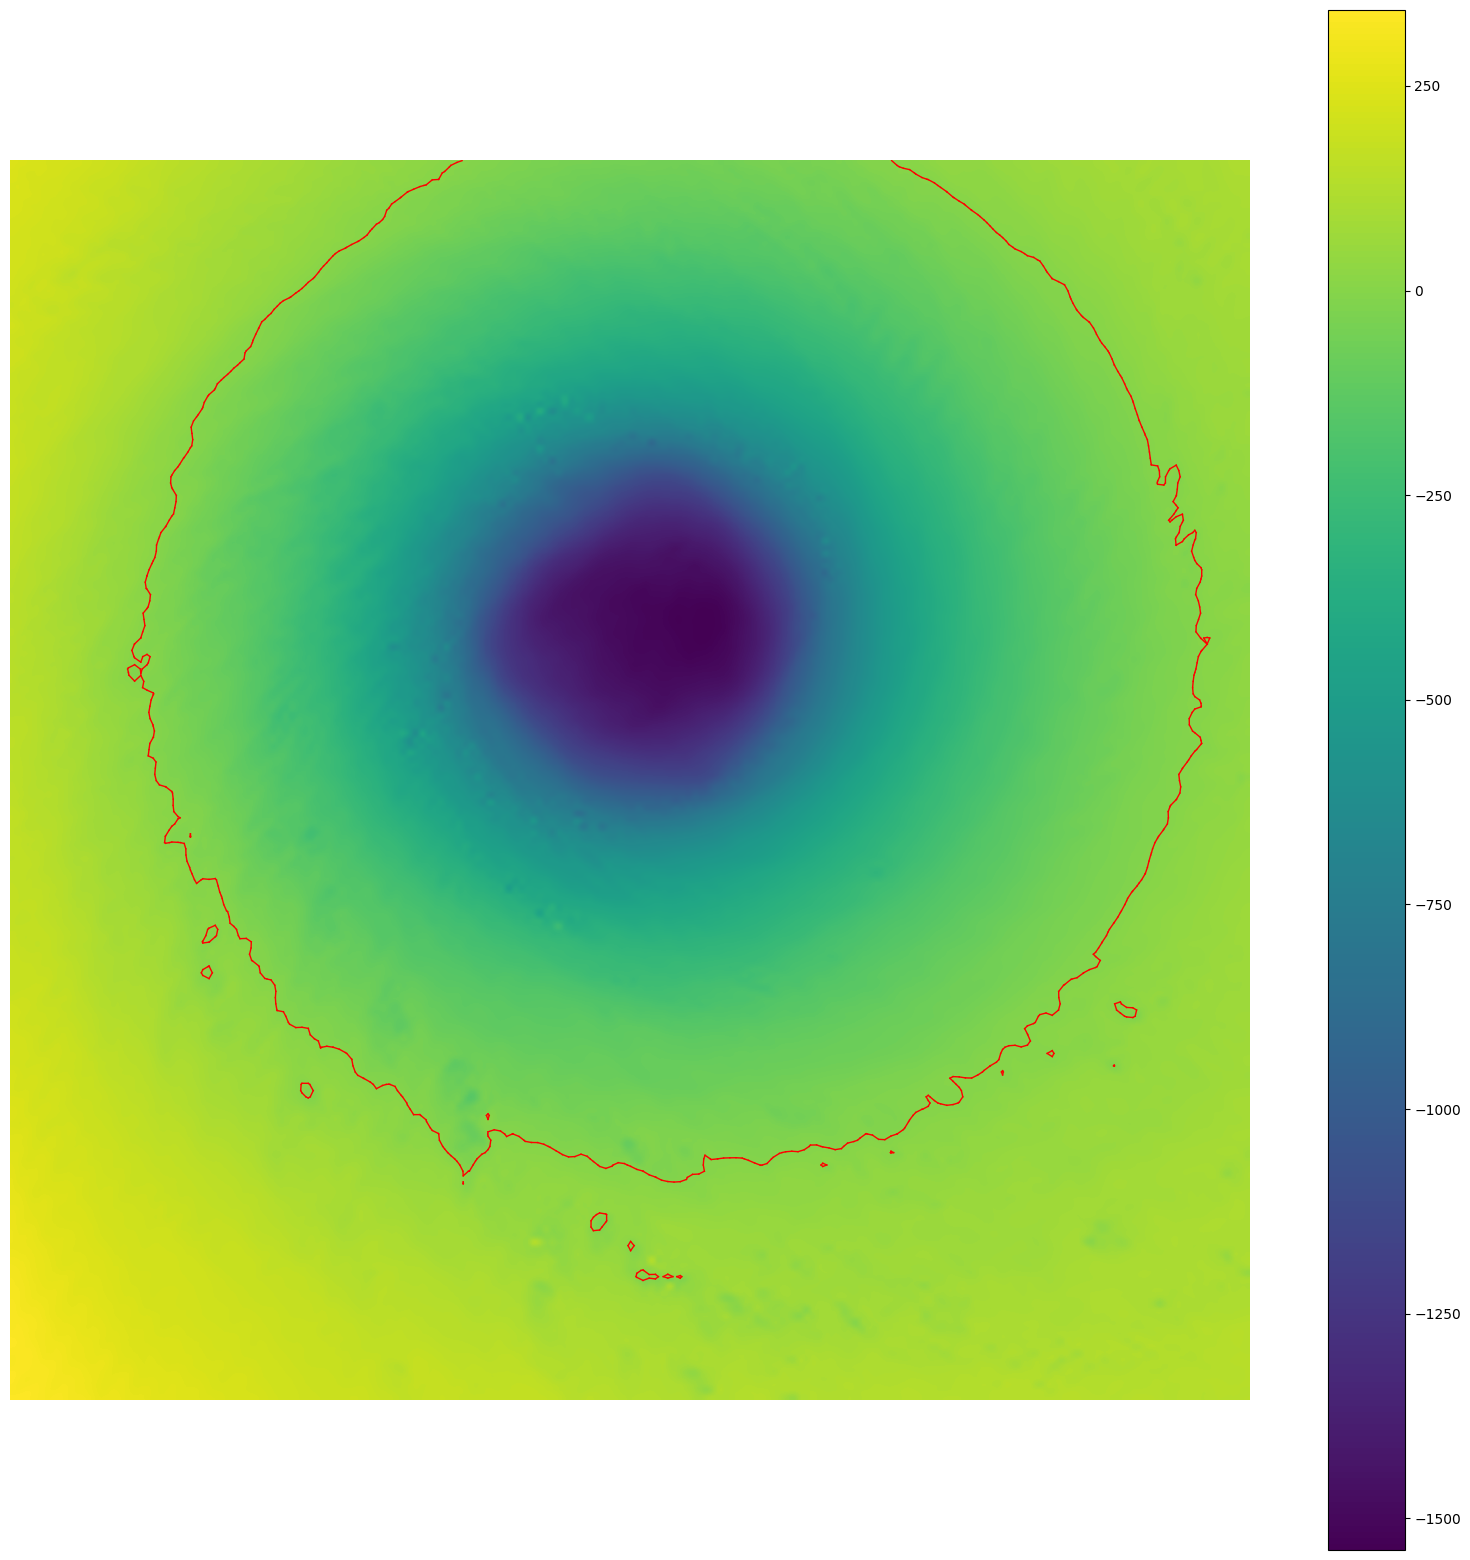

In [97]:
from re import X
import numpy as np
import matplotlib.pyplot as plt

data2D = 0
data2DPlot = 0

##### draw a line segment between [x0, y0] -> [x1, y1]. color: color of the line semgne
##### DO NOT modify this function
def plotOneEdge(x0, y0, x1, y1, color="white"):
#     plt.plot([y0*5,y1*5], [x0*5,x1*5], linewidth=1, color=color)
    plt.plot([x0*5,x1*5], [y0*5,y1*5], linewidth=1, color=color)

##### x, y: location. Return: data value at [x,y]
##### DO NOT modify this function
def getDataValue(x, y):
    return data2D[x, y]

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize():
    global data2D
    global data2DPlot
    data2D = np.load("rawData.npy").transpose()
    data2DPlot = np.load("plotData.npy")

    plt.rcParams['figure.figsize'] = [20, 20]
    plt.axis('off')
    plt.imshow(data2DPlot)
    plt.colorbar()

##### (TODO) WORK on this function
#####compute and draw the isocontour of the given datavalue ("isovalue")
#####color: isocontour color
##### you should use "getDataVlue()" to get the data you want and use "plotOneEdge()" to a segment of the isocontour
#### # I do not mind the computation is efficnet or not

class Node:
    x = 0
    y = 0
    val = 0
    state = False
    def __init__(self, x, y, iso):
        self.x = x
        self.y = y
        self.val = getDataValue(x, y)
        self.state = self.val > iso
        

def insertion(i1, v1, i2, v2, val):
    return (v1 - val) / (v1 - v2) * (i2 - i1) + i1

def computePlotIsoContour( isovalue, color ):
    for y in range(199):
        for x in range(199):
            # node1 node2
            # node3 node4
            node1 = Node(x, y, isovalue)
            node2 = Node(x + 1, y, isovalue)
            node3 = Node(x, y + 1, isovalue)
            node4 = Node(x + 1, y + 1, isovalue)
            node_state_sum = int(node1.state == True) + int(node2.state == True) + int(node3.state == True) + int(node4.state == True)

            if node_state_sum == 1:
                if node1.state:
                    plotOneEdge(insertion(node1.x, node1.val, node2.x, node2.val, isovalue), node1.y, node1.x, insertion(node1.y, node1.val, node3.y, node3.val, isovalue), color)
                if node2.state:
                    plotOneEdge(insertion(node2.x, node2.val, node1.x, node1.val, isovalue), node2.y, node2.x, insertion(node2.y, node2.val, node4.y, node4.val, isovalue), color)
                if node3.state:
                    plotOneEdge(insertion(node3.x, node3.val, node4.x, node4.val, isovalue), node3.y, node3.x, insertion(node3.y, node3.val, node1.y, node1.val, isovalue), color)
                if node4.state:
                    plotOneEdge(insertion(node4.x, node4.val, node3.x, node3.val, isovalue), node4.y, node4.x, insertion(node4.y, node4.val, node2.y, node2.val, isovalue), color)
            if node_state_sum == 3:
                if not node1.state:
                    plotOneEdge(insertion(node1.x, node1.val, node2.x, node2.val, isovalue), node1.y, node1.x, insertion(node1.y, node1.val, node3.y, node3.val, isovalue), color)
                if not node2.state:
                    plotOneEdge(insertion(node2.x, node2.val, node1.x, node1.val, isovalue), node2.y, node2.x, insertion(node2.y, node2.val, node4.y, node4.val, isovalue), color)
                if not node3.state:
                    plotOneEdge(insertion(node3.x, node3.val, node4.x, node4.val, isovalue), node3.y, node3.x, insertion(node3.y, node3.val, node1.y, node1.val, isovalue), color)
                if not node4.state:
                    plotOneEdge(insertion(node4.x, node4.val, node3.x, node3.val, isovalue), node4.y, node4.x, insertion(node4.y, node4.val, node2.y, node2.val, isovalue), color)
            if node_state_sum == 2:
                if (node1.state & node2.state) | (node3.state & node4.state):
                    plotOneEdge(node1.x, insertion(node1.y, node1.val, node3.y, node3.val, isovalue), node2.x, insertion(node2.y, node2.val, node4.y, node4.val, isovalue), color)
                if (node1.state & node3.state) | (node2.state & node4.state):
                    plotOneEdge(insertion(node1.x, node1.val, node2.x, node2.val, isovalue), node1.y, insertion(node3.x, node3.val, node4.x, node4.val, isovalue), node3.y, color)
                if (node1.state & node4.state):
                    plotOneEdge(insertion(node1.x, node1.val, node2.x, node2.val, isovalue), node1.y, node2.x, insertion(node2.y, node2.val, node4.y, node4.val, isovalue), color)
                    plotOneEdge(insertion(node3.x, node3.val, node4.x, node4.val, isovalue), node3.y, node1.x, insertion(node1.y, node1.val, node3.y, node3.val, isovalue), color)
                if (node2.state & node3.state):
                    plotOneEdge(insertion(node1.x, node1.val, node2.x, node2.val, isovalue), node1.y, node1.x, insertion(node1.y, node1.val, node3.y, node3.val, isovalue), color)
                    plotOneEdge(insertion(node3.x, node3.val, node4.x, node4.val, isovalue), node3.y, node2.x, insertion(node2.y, node2.val, node4.y, node4.val, isovalue), color)
                    

##### main 
Initialize()
##### You can modify this function call to test your program on different isovalues
computePlotIsoContour(0, "red")

plt.show()